##Problem Statement:
###A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.
#In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
###Goal:

#Developing a model to find the variables which are significant the demand for shared bikes with the available independent variables.
#It will be used by the management to understand and manipulate the business strategy to meet the customer's expectations.

In [109]:
##Step 1: Reading and Understanding the Data
##Let us import all the useful libarary
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
bike_revenue= pd.read_csv("day.csv")
bike_revenue.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
###data sanity check
bike_revenue.shape

(730, 16)

In [4]:
bike_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
##missing value check
bike_revenue.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
### checking for dupluicacy
bike_revenue.shape, bike_revenue.drop_duplicates().shape

((730, 16), (730, 16))

In [7]:
# Droping instant column as it is index column which has nothing to do with target
bike_revenue.drop(['instant'], axis = 1, inplace = True)
# Droping  columns casual, registered	because we have sum of these columns known as cnt
bike_revenue.drop(['casual', 'registered'], axis = 1, inplace = True)
## droping dteday because it is redundant
bike_revenue.drop(['dteday'], axis = 1, inplace = True)

In [8]:
##after dropping checking the shape of data
bike_revenue.shape

(730, 12)

In [9]:
##chechking the unique value
bike_revenue.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [10]:
##changing thr day type for getting categorical value
bike_revenue['mnth'] = bike_revenue['mnth'].apply(str)
bike_revenue['mnth'].dtype
##changing months values into categorical "Jan","Feb","Mar", "Apr", "May","Jun", "Jul", "Aug", "sep", "oct", "nov", "dec"
bike_revenue.mnth = bike_revenue.mnth.replace(["1","2","3","4","5","6","7","8","9","10","11","12"], ["Jan","Feb","Mar", "Apr", "May","Jun", "Jul", "Aug", "sep", "oct", "nov", "dec"])
bike_revenue.mnth.values
###changine the datatype of season into object for changing into categorical value
bike_revenue['season'] = bike_revenue['season'].apply(str)
##changing season values into categorical "Spring","Summer", "Fall", "Winter"
bike_revenue.season = bike_revenue.season.replace(["1","2","3","4"], ["Spring","Summer", "Fall", "Winter"])
bike_revenue.season.values
###changine the datatype of weekday into object for changing into categorical value
bike_revenue['weekday'] = bike_revenue['weekday'].apply(str)
##changing weekday values into categorical "Mon","Tue", "Wed","Thurs","Fri","Sat", "Sun"
bike_revenue.weekday = bike_revenue.weekday.replace(['1', '2', '3', '4', '5', '6', '0'],["Mon","Tue", "Wed","Thurs","Fri","Sat", "Sun"])
bike_revenue.weekday.values
##checking the datatype of weathersit
bike_revenue.weathersit.dtype
##changine the data type of weather sit into string for  changing into categorical value
bike_revenue.weathersit=bike_revenue.weathersit.apply(str)
bike_revenue.weathersit.dtype
##changine the weathersit value into "Clear, Few clouds, Partly cloudy, Partly cloudy","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
#"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
bike_revenue.weathersit = bike_revenue.weathersit.replace(["1","2","3","4"],["Clear", "Mist","Light Snow","Heavy Rain"])
bike_revenue.weathersit.values

array(['Mist', 'Mist', 'Clear', 'Clear', 'Clear', 'Clear', 'Mist', 'Mist',
       'Clear', 'Clear', 'Mist', 'Clear', 'Clear', 'Clear', 'Mist',
       'Clear', 'Mist', 'Mist', 'Mist', 'Mist', 'Clear', 'Clear', 'Clear',
       'Clear', 'Mist', 'Light Snow', 'Clear', 'Mist', 'Clear', 'Clear',
       'Mist', 'Mist', 'Mist', 'Clear', 'Mist', 'Mist', 'Clear', 'Clear',
       'Clear', 'Mist', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear',
       'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Mist',
       'Clear', 'Clear', 'Mist', 'Mist', 'Clear', 'Clear', 'Mist',
       'Clear', 'Clear', 'Clear', 'Mist', 'Mist', 'Mist', 'Clear',
       'Clear', 'Mist', 'Light Snow', 'Mist', 'Clear', 'Clear', 'Clear',
       'Mist', 'Mist', 'Clear', 'Clear', 'Clear', 'Clear', 'Mist',
       'Clear', 'Mist', 'Mist', 'Clear', 'Clear', 'Mist', 'Clear',
       'Clear', 'Mist', 'Light Snow', 'Mist', 'Mist', 'Clear', 'Clear',
       'Mist', 'Clear', 'Clear', 'Mist', 'Mist', 'Mist', 'Mist', 'Mist',
       'Mis

In [11]:
bike_revenue.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
##checking the nunique values
bike_revenue.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [13]:
##segragating the data continous and categorical columns
cat_cols=["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
cont_cols=["temp", "atemp", "hum","windspeed"]
target=["cnt"]
len(cat_cols)+len(cont_cols)+len(target)

12

In [14]:
bike_revenue.shape

(730, 12)

In [15]:
###EDA

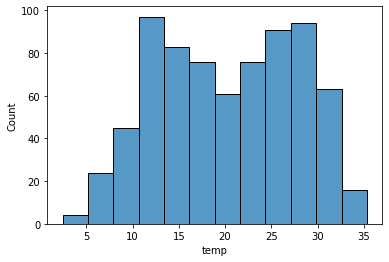

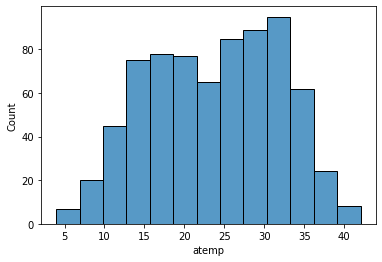

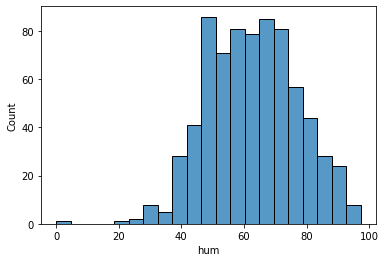

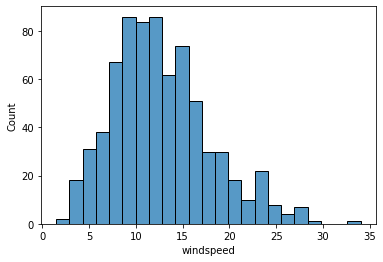

In [16]:
###univariate analysis
##for histogram
for i in cont_cols:
  sns.histplot(bike_revenue[i])
  plt.show()


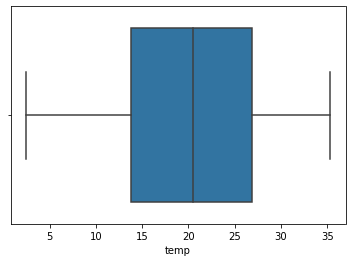

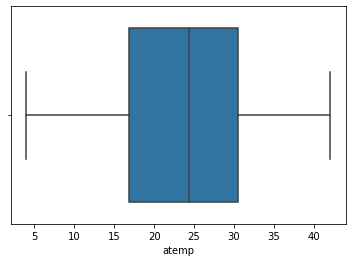

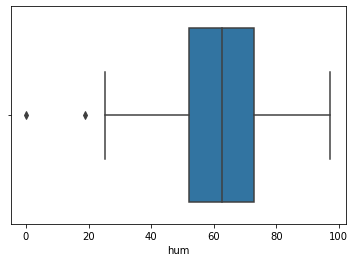

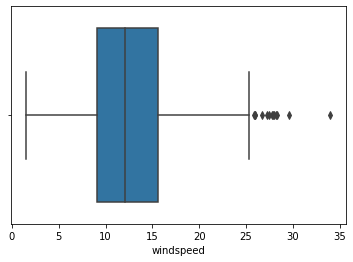

In [17]:
###univariate analysis
##for boxplot
for i in cont_cols:
  sns.boxplot(bike_revenue[i])
  plt.show()

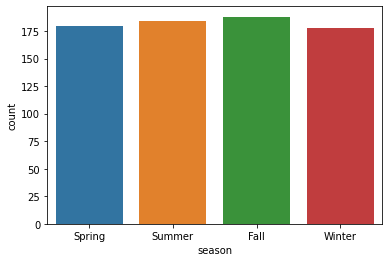

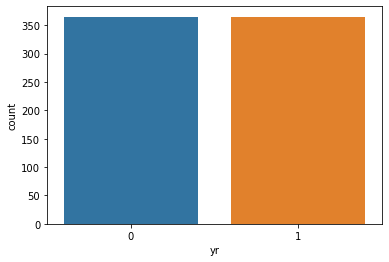

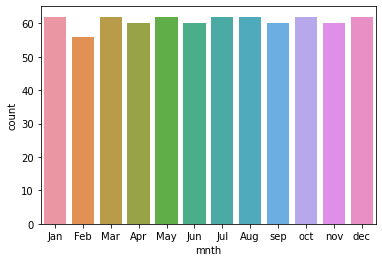

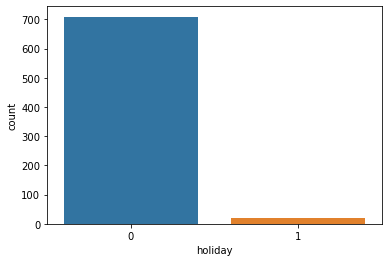

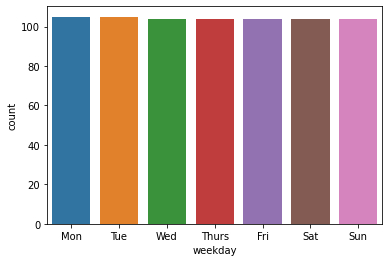

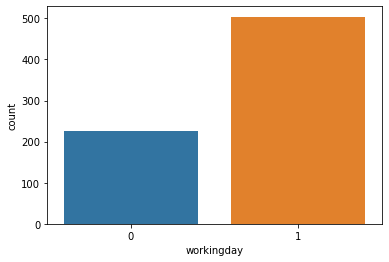

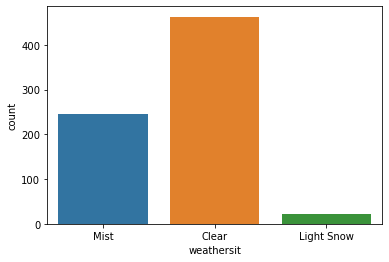

In [18]:
###for ccategorical column
##countplot
for i in cat_cols:
  sns.countplot(bike_revenue[i])
  plt.show()

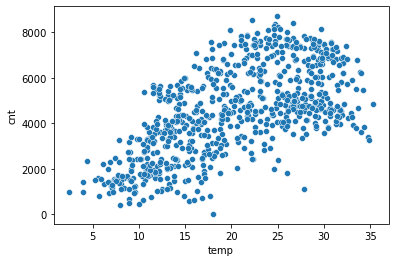

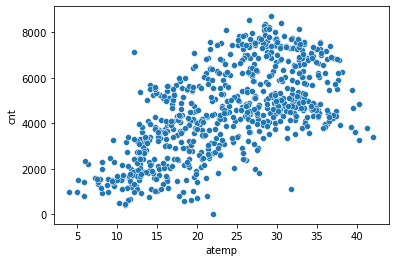

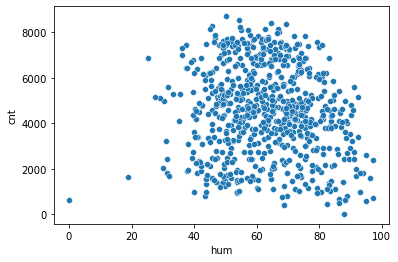

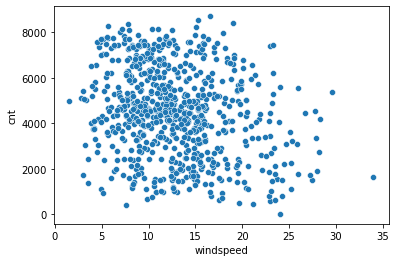

In [19]:
##bivariate analysis
##for continous to continous
for i in cont_cols:
  sns.scatterplot(bike_revenue[i], bike_revenue["cnt"])
  plt.show()

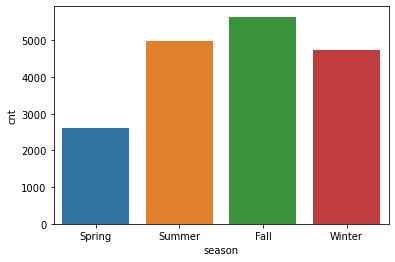

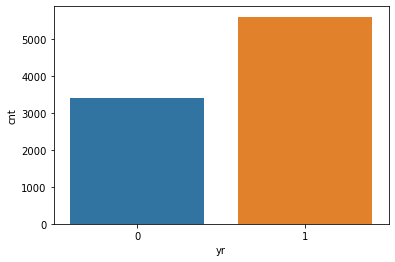

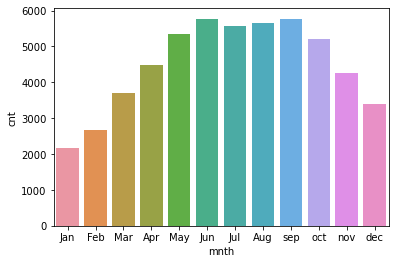

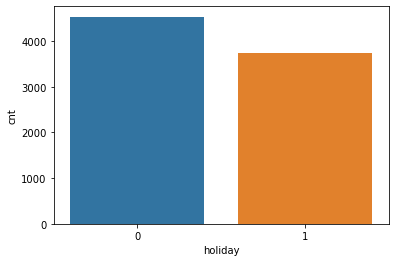

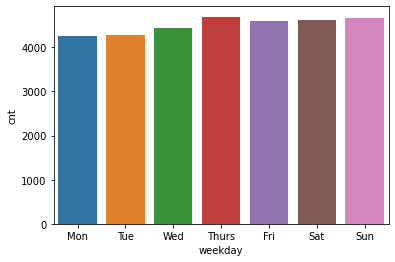

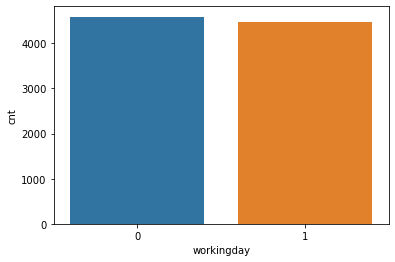

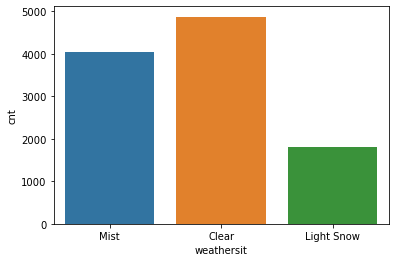

In [20]:
##for categorical and contnous usong barplot
for i in cat_cols:
  sns.barplot(bike_revenue[i], bike_revenue["cnt"], ci=None)
  plt.show()

<Figure size 1440x1080 with 0 Axes>

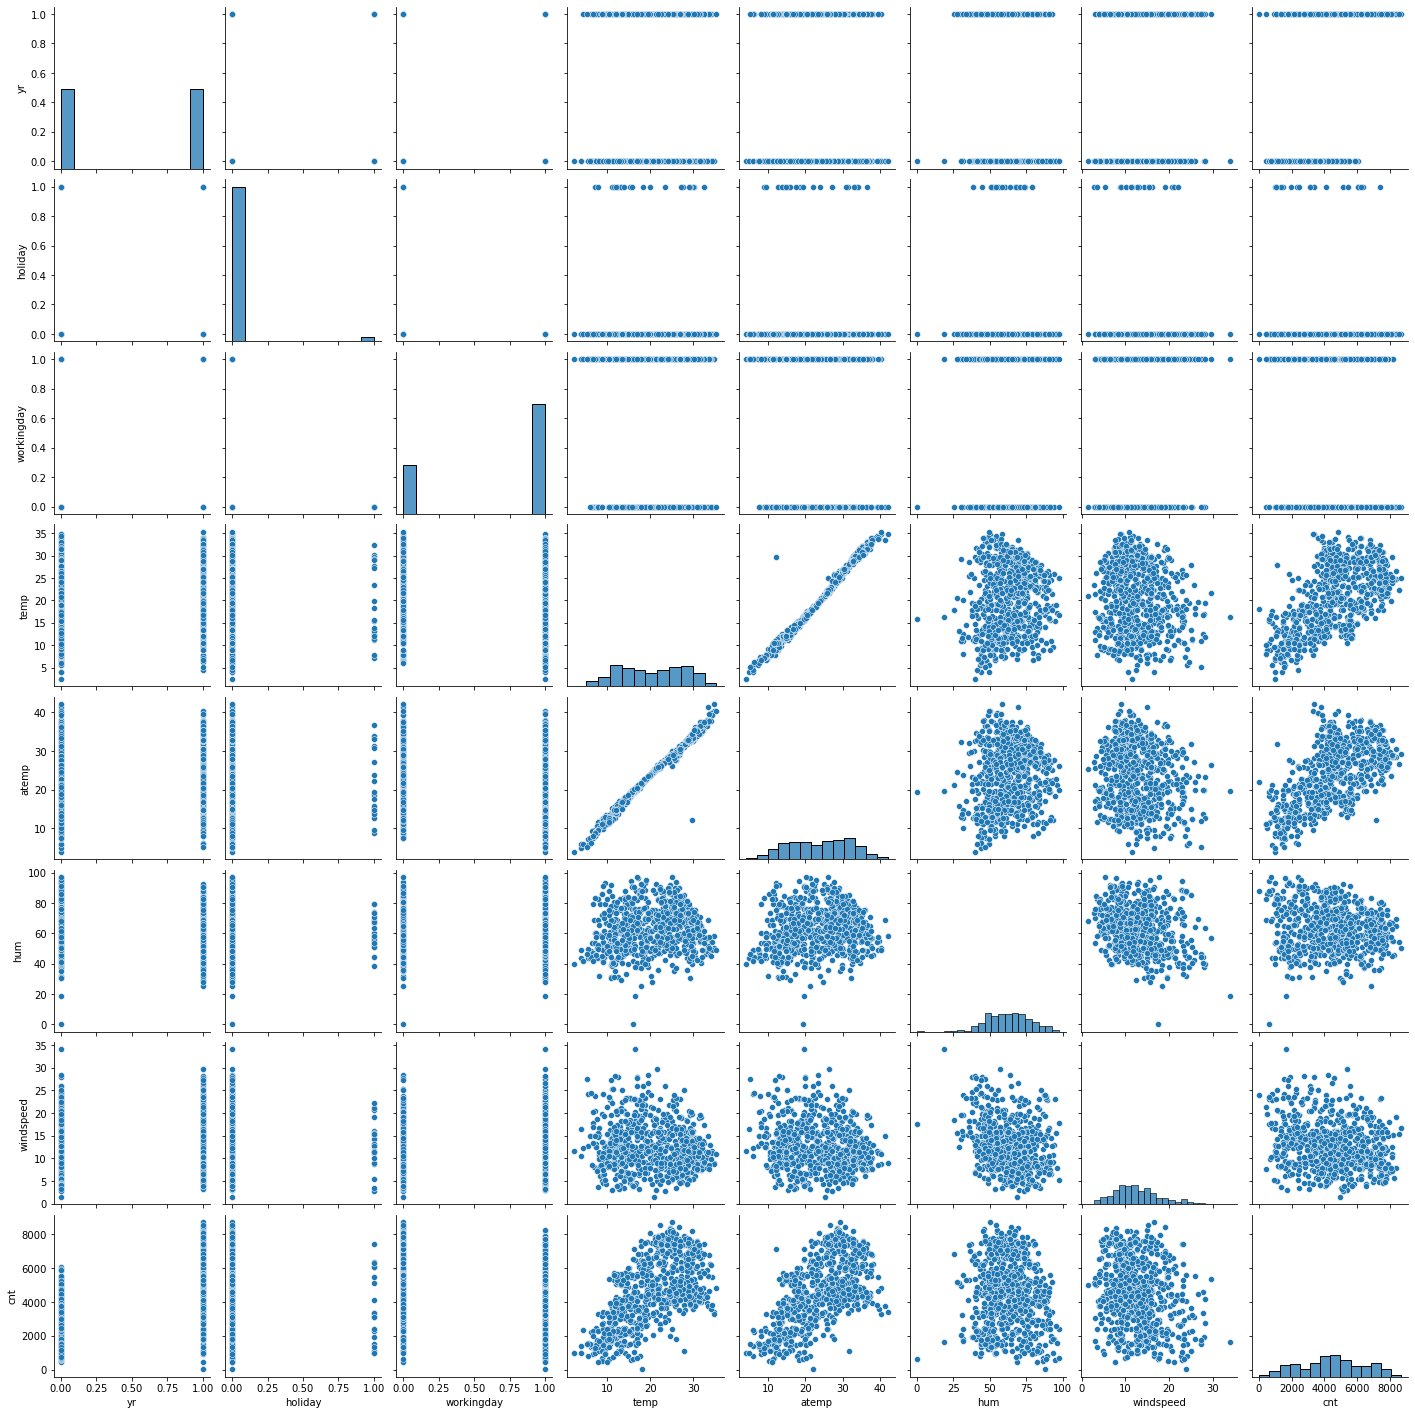

In [21]:
### for bivariate we can use paiplot as well
plt.figure(figsize=(20,15))
sns.pairplot(bike_revenue)
plt.show()

<AxesSubplot:>

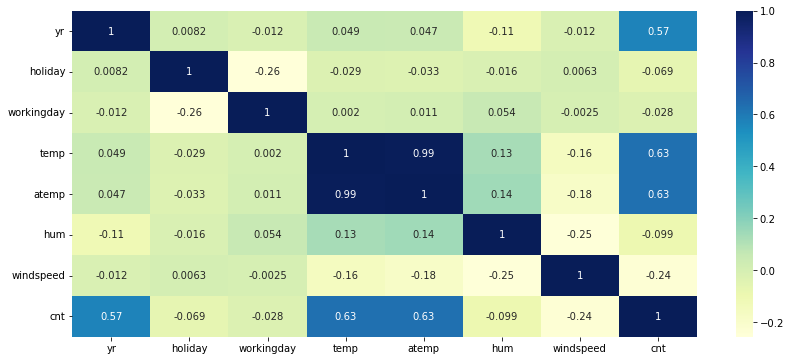

In [22]:
###mulivariate using heatmap
plt.figure(figsize=(14,6))
sns.heatmap(bike_revenue.corr(), annot=True, cmap='YlGnBu')


In [23]:
###Data Prepartion
###preparing data for modelling
##encoding:
       ##categorical varaibe into dummy variables


In [24]:
bike_revenue=pd.get_dummies(data=bike_revenue, columns=["season","mnth","weekday"], drop_first=True)

In [25]:

bike_revenue = pd.get_dummies(data=bike_revenue,columns=["weathersit"])

In [26]:
bike_revenue.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
###splitting into train and test
df_train,df_test= train_test_split(bike_revenue, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [28]:
###rescalinf the features
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1683,0,1,...,0,0,0,1,0,0,0,0,0,1


In [30]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883
std,0.225858,0.212410,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179
50%,0.542596,0.529718,0.653714,0.296763
75%,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


In [31]:
###Trainging the model


In [32]:
##asssigning the value X_train and y_train
y_train=df_train.pop("cnt")
X_train=df_train

In [33]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [34]:
###adding all variable to the model
bike_revenue.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_dec', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [35]:
##let us build the model with all the variable
X_train_sm=sm.add_constant(X_train)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.24e-177
Time:                        18:57:46   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     480   BIC:                             8392.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1901.2034    563.637      3.373      0.001     793.702    3008.705
yr                     2009.7544     70.866     28.360      0.000    1870.508    2149.001
holiday               -1169.5077    569.440     -2.054      0.041   -2288.411     -50.605
workingday             -525.6684    618.955     -0.849      0.396   -1741.865     690.528
temp                   3366.6047   1247.170      2.699      0.007     916.018    5817.191
atemp                   475.2925   1211.893      0.392      0.695   -1905.979    2856.564
hum                   -1372.1930    338.791     -4.050      0.000   -2037.889    -706.497
windspeed             -1566.6529    232.078     -6.751      0.000   -2022.668   -1110.638
season_Spring          -355.2929    263.379     -1.349      0.178    -872.810     162.225
season_Summer           398.3876    229.833      1.733      0.084     -53.215     849.990
season_Winter           974.5314    245.553      3.969      0.000     492.040    1457.023
mnth_Aug                252.5555    297.445      0.849      0.396    -331.900     837.011
mnth_Feb               -324.2265    289.864     -1.119      0.264    -893.786     245.333
mnth_Jan               -556.4133    294.909     -1.887      0.060   -1135.885      23.059
mnth_Jul               -238.0233    308.061     -0.773      0.440    -843.338     367.291
mnth_Jun                 84.3752    219.499      0.384      0.701    -346.923     515.673
mnth_Mar                  8.9499    215.757      0.041      0.967    -414.995     432.895
mnth_May                222.0880    185.708      1.196      0.232    -142.814     586.990
mnth_dec               -386.0892    295.079     -1.308      0.191    -965.895     193.717
mnth_nov               -343.7077    319.425     -1.076      0.282    -971.353     283.937
mnth_oct                 50.1644    315.214      0.159      0.874    -569.206     669.535
mnth_sep                795.8651    280.499      2.837      0.005     244.708    1347.022
weekday_Mon            -214.3507    126.997     -1.688      0.092    -463.889      35.188
weekday_Sat            -484.3144    623.693     -0.777      0.438   -1709.821     741.192
weekday_Sun            -433.5454    622.994     -0.696      0.487   -1657.678     790.588
weekday_Thurs            36.4949    130.327      0.280      0.780    -219.586     292.576
weekday_Tue            -227.0532    127.861     -1.776      0.076    -478.289      24.183
weekday_Wed             -89.0980    132.913     -0.670      0.503    -350.262     172.066
weathersit_Clear       1523.3438    194.048      7.850      0.000    1142.055    1904.633
weathersit_Light Snow  -643.0289    254.543     -2.526      0.012   -1143.185    -142.873
weathersit_Mist        1020.8885    200.870      5.082      0.000     626.196    1415.581
=======================

In [36]:
##we will drop the value by two significance
##Significance(p-value)
##VIF


In [37]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,weathersit_Clear,289.67
29,weathersit_Mist,164.60
3,temp,66.83
2,workingday,66.33
4,atemp,55.81
23,weekday_Sun,38.79
22,weekday_Sat,36.99
28,weathersit_Light Snow,15.32
7,season_Spring,10.77
9,season_Winter,9.47


In [38]:
#we could have 
#high VIF, high p-vlue # if we have high p vlue and high vif drop them first instant
##high_low cases:
    #high p-value, low vif : Remove these first
    #low p value, high vif : remove these after the ones above         
#low vif low p-value:keep it

In [39]:
###making another model after droping mnt_mar high p-value
X=X_train.drop("mnth_Mar", axis=1)

In [40]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_dec',
       'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Clear', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [41]:
##creating another model
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.53
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.24e-178
Time:                        18:57:48   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     481   BIC:                             8386.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1905.4117    553.856      3.440      0.001     817.135    2993.689
yr                     2009.7379     70.792     28.389      0.000    1870.639    2148.837
holiday               -1169.4868    568.848     -2.056      0.040   -2287.222     -51.752
workingday             -525.4898    618.298     -0.850      0.396   -1740.388     689.408
temp                   3364.9429   1245.232      2.702      0.007     918.177    5811.709
atemp                   474.1057   1210.297      0.392      0.695   -1904.018    2852.229
hum                   -1371.0660    337.349     -4.064      0.000   -2033.926    -708.206
windspeed             -1567.1474    231.531     -6.769      0.000   -2022.085   -1112.210
season_Spring          -351.7656    249.015     -1.413      0.158    -841.058     137.527
season_Summer           396.5736    225.400      1.759      0.079     -46.316     839.463
season_Winter           976.4328    240.986      4.052      0.000     502.917    1449.948
mnth_Aug                248.4641    280.325      0.886      0.376    -302.349     799.277
mnth_Feb               -333.0894    195.680     -1.702      0.089    -717.583      51.404
mnth_Jan               -565.5387    196.204     -2.882      0.004    -951.062    -180.016
mnth_Jul               -241.8812    293.382     -0.824      0.410    -818.350     334.587
mnth_Jun                 81.4726    207.831      0.392      0.695    -326.897     489.842
mnth_May                219.3729    173.611      1.264      0.207    -121.757     560.503
mnth_dec               -393.8291    228.359     -1.725      0.085    -842.534      54.876
mnth_nov               -350.7451    270.368     -1.297      0.195    -881.993     180.502
mnth_oct                 43.4011    269.491      0.161      0.872    -486.124     572.926
mnth_sep                791.0105    254.654      3.106      0.002     290.638    1291.383
weekday_Mon            -214.6079    126.714     -1.694      0.091    -463.589      34.373
weekday_Sat            -484.2186    623.041     -0.777      0.437   -1708.438     740.001
weekday_Sun            -433.3517    622.330     -0.696      0.487   -1656.173     789.470
weekday_Thurs            36.5379    130.187      0.281      0.779    -219.268     292.344
weekday_Tue            -227.2119    127.671     -1.780      0.076    -478.073      23.650
weekday_Wed             -89.1849    132.759     -0.672      0.502    -350.044     171.674
weathersit_Clear       1524.7448    190.888      7.988      0.000    1149.667    1899.822
weathersit_Light Snow  -641.5700    251.839     -2.548      0.011   -1136.411    -146.729
weathersit_Mist        1022.2369    198.016      5.162      0.000     633.153    1411.321
==============================================================================
Omnibus:                       78.

In [42]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,weathersit_Clear,280.02
28,weathersit_Mist,159.38
3,temp,66.76
2,workingday,66.33
4,atemp,55.78
22,weekday_Sun,38.79
21,weekday_Sat,36.99
27,weathersit_Light Snow,14.86
7,season_Spring,9.65
9,season_Winter,9.14


In [43]:
### dropping mnth_oct and creating another model
X=X.drop("mnth_oct", axis=1)


In [44]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_dec',
       'mnth_nov', 'mnth_sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [45]:
##let us build the another model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.24e-179
Time:                        18:57:49   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1915.2866    549.895      3.483      0.001     834.798    2995.775
yr                     2009.2033     70.642     28.442      0.000    1870.398    2148.008
holiday               -1169.0208    568.266     -2.057      0.040   -2285.606     -52.436
workingday             -528.1059    617.459     -0.855      0.393   -1741.350     685.139
temp                   3368.2911   1243.800      2.708      0.007     924.352    5812.230
atemp                   474.6890   1209.068      0.393      0.695   -1901.007    2850.385
hum                   -1365.8600    335.457     -4.072      0.000   -2024.999    -706.721
windspeed             -1565.6720    231.116     -6.774      0.000   -2019.792   -1111.552
season_Spring          -359.9750    243.496     -1.478      0.140    -838.419     118.469
season_Summer           382.7247    208.141      1.839      0.067     -26.251     791.700
season_Winter           994.5612    212.865      4.672      0.000     576.302    1412.820
mnth_Aug                231.0961    258.489      0.894      0.372    -276.809     739.001
mnth_Feb               -340.1511    190.511     -1.785      0.075    -714.487      34.185
mnth_Jan               -572.3473    191.401     -2.990      0.003    -948.432    -196.263
mnth_Jul               -259.3380    272.348     -0.952      0.341    -794.474     275.798
mnth_Jun                 73.3710    201.447      0.364      0.716    -322.453     469.195
mnth_May                216.1936    172.311      1.255      0.210    -122.379     554.767
mnth_dec               -419.7508    161.827     -2.594      0.010    -737.725    -101.777
mnth_nov               -384.8698    167.761     -2.294      0.022    -714.504     -55.236
mnth_sep                769.6824    217.289      3.542      0.000     342.731    1196.634
weekday_Mon            -213.4599    126.385     -1.689      0.092    -461.794      34.874
weekday_Sat            -486.1930    622.291     -0.781      0.435   -1708.931     736.545
weekday_Sun            -435.7274    621.526     -0.701      0.484   -1656.963     785.508
weekday_Thurs            36.7364    130.050      0.282      0.778    -218.798     292.271
weekday_Tue            -227.2152    127.542     -1.781      0.075    -477.822      23.391
weekday_Wed             -88.7700    132.599     -0.669      0.504    -349.314     171.774
weathersit_Clear       1527.8670    189.709      8.054      0.000    1155.108    1900.626
weathersit_Light Snow  -637.5457    250.343     -2.547      0.011   -1129.445    -145.647
weathersit_Mist        1024.9652    197.091      5.200      0.000     637.702    1412.229
==============================================================================
Omnibus:                       78.141   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarqu

In [46]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,weathersit_Clear,276.57
27,weathersit_Mist,157.59
3,temp,66.75
2,workingday,66.28
4,atemp,55.78
21,weekday_Sun,38.76
20,weekday_Sat,36.97
26,weathersit_Light Snow,14.68
7,season_Spring,9.25
9,season_Winter,7.14


In [47]:
## dropping weekday_Thurs from the df 
X=X.drop("weekday_Thurs", axis=1)
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_dec',
       'mnth_nov', 'mnth_sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [48]:
##let us build the another model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.24e-180
Time:                        18:57:50   Log-Likelihood:                -4102.8
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     483   BIC:                             8374.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1927.2907    547.728      3.519      0.000     851.066    3003.516
yr                     2009.7457     70.549     28.487      0.000    1871.125    2148.366
holiday               -1168.8512    567.724     -2.059      0.040   -2284.365     -53.337
workingday             -526.3524    616.840     -0.853      0.394   -1738.373     685.668
temp                   3367.9873   1242.614      2.710      0.007     926.391    5809.584
atemp                   476.2677   1207.903      0.394      0.694   -1897.127    2849.662
hum                   -1368.9466    334.960     -4.087      0.000   -2027.105    -710.789
windspeed             -1566.7562    230.864     -6.786      0.000   -2020.378   -1113.134
season_Spring          -361.1896    243.226     -1.485      0.138    -839.101     116.722
season_Summer           384.1783    207.879      1.848      0.065     -24.280     792.637
season_Winter           995.6616    212.627      4.683      0.000     577.874    1413.450
mnth_Aug                230.9621    258.242      0.894      0.372    -276.455     738.380
mnth_Feb               -338.1125    190.193     -1.778      0.076    -711.821      35.596
mnth_Jan               -572.1307    191.217     -2.992      0.003    -947.852    -196.410
mnth_Jul               -257.6828    272.025     -0.947      0.344    -792.182     276.816
mnth_Jun                 70.2963    200.961      0.350      0.727    -324.571     465.163
mnth_May                216.0092    172.145      1.255      0.210    -122.237     554.255
mnth_dec               -422.4100    161.399     -2.617      0.009    -739.541    -105.279
mnth_nov               -386.4764    167.505     -2.307      0.021    -715.605     -57.348
mnth_sep                769.2083    217.076      3.544      0.000     342.679    1195.738
weekday_Mon            -231.4318    109.100     -2.121      0.034    -445.801     -17.063
weekday_Sat            -502.4249    619.042     -0.812      0.417   -1718.773     713.923
weekday_Sun            -452.1435    618.214     -0.731      0.465   -1666.864     762.577
weekday_Tue            -245.4811    109.830     -2.235      0.026    -461.284     -29.678
weekday_Wed            -106.7510    116.211     -0.919      0.359    -335.093     121.590
weathersit_Clear       1534.1394    188.226      8.151      0.000    1164.297    1903.982
weathersit_Light Snow  -637.3719    250.104     -2.548      0.011   -1128.798    -145.946
weathersit_Mist        1030.5231    195.919      5.260      0.000     645.563    1415.483
==============================================================================
Omnibus:                       78.453   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.587
Skew:                          -0.766   Prob(JB):       

In [49]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weathersit_Clear,274.35
26,weathersit_Mist,156.46
3,temp,66.75
2,workingday,66.28
4,atemp,55.78
21,weekday_Sun,38.43
20,weekday_Sat,36.66
25,weathersit_Light Snow,14.63
7,season_Spring,9.24
9,season_Winter,7.14


In [50]:
### droping atemp for another moder
X=X.drop("atemp", axis=1)
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_dec',
       'mnth_nov', 'mnth_sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Clear',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [51]:
##let us build the another model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.27e-181
Time:                        18:57:51   Log-Likelihood:                -4102.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     484   BIC:                             8368.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1922.9401    547.139      3.515      0.000     847.878    2998.002
yr                     2009.0141     70.463     28.512      0.000    1870.563    2147.465
holiday               -1170.6290    567.211     -2.064      0.040   -2285.129     -56.129
workingday             -522.6652    616.230     -0.848      0.397   -1733.482     688.152
temp                   3831.9260    399.176      9.600      0.000    3047.594    4616.258
hum                   -1364.7021    334.494     -4.080      0.000   -2021.943    -707.462
windspeed             -1586.2076    225.335     -7.039      0.000   -2028.963   -1143.452
season_Spring          -357.7746    242.859     -1.473      0.141    -834.963     119.414
season_Summer           389.8010    207.208      1.881      0.061     -17.338     796.940
season_Winter           999.7535    212.188      4.712      0.000     582.830    1416.677
mnth_Aug                216.5106    255.405      0.848      0.397    -285.329     718.350
mnth_Feb               -337.2151    190.014     -1.775      0.077    -710.569      36.139
mnth_Jan               -571.8311    191.049     -2.993      0.003    -947.219    -196.443
mnth_Jul               -266.6932    270.827     -0.985      0.325    -798.835     265.449
mnth_Jun                 59.4093    198.882      0.299      0.765    -331.369     450.188
mnth_May                209.4567    171.192      1.224      0.222    -126.914     545.827
mnth_dec               -420.6073    161.194     -2.609      0.009    -737.333    -103.882
mnth_nov               -385.2516    167.330     -2.302      0.022    -714.035     -56.468
mnth_sep                763.6857    216.434      3.528      0.000     338.419    1188.953
weekday_Mon            -231.1324    109.002     -2.120      0.034    -445.308     -16.957
weekday_Sat            -502.5592    618.501     -0.813      0.417   -1717.839     712.720
weekday_Sun            -448.6587    617.611     -0.726      0.468   -1662.188     764.871
weekday_Tue            -245.1285    109.730     -2.234      0.026    -460.735     -29.522
weekday_Wed            -106.6238    116.109     -0.918      0.359    -334.764     121.516
weathersit_Clear       1534.8832    188.052      8.162      0.000    1165.384    1904.382
weathersit_Light Snow  -642.8556    249.499     -2.577      0.010   -1133.091    -152.621
weathersit_Mist        1030.9125    195.746      5.267      0.000     646.296    1415.529
==============================================================================
Omnibus:                       77.776   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.211
Skew:                          -0.761   Prob(JB):                     4.53e-45
Kurtosis:                       5.701   Cond. No.                  

In [52]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weathersit_Clear,274.31
25,weathersit_Mist,156.43
2,workingday,66.26
20,weekday_Sun,38.42
19,weekday_Sat,36.66
24,weathersit_Light Snow,14.61
6,season_Spring,9.23
8,season_Winter,7.12
3,temp,6.90
1,holiday,6.80


In [53]:
###Let us drop mnth_Jun
X=X.drop("mnth_Jun", axis=1)
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_dec', 'mnth_nov',
       'mnth_sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [54]:
##let us build the another model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.22e-182
Time:                        18:57:51   Log-Likelihood:                -4102.9
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     485   BIC:                             8362.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1921.5234    546.605      3.515      0.000     847.517    2995.529
yr                     2007.2025     70.136     28.619      0.000    1869.395    2145.009
holiday               -1169.5609    566.667     -2.064      0.040   -2282.986     -56.136
workingday             -515.5897    615.197     -0.838      0.402   -1724.369     693.190
temp                   3895.6389    337.099     11.556      0.000    3233.284    4557.994
hum                   -1378.3903    331.030     -4.164      0.000   -2028.819    -727.961
windspeed             -1593.5754    223.770     -7.121      0.000   -2033.255   -1153.896
season_Spring          -377.5907    233.404     -1.618      0.106    -836.199      81.017
season_Summer           379.1472    203.924      1.859      0.064     -21.536     779.831
season_Winter           977.7810    198.844      4.917      0.000     587.079    1368.483
mnth_Aug                171.9552    207.132      0.830      0.407    -235.031     578.942
mnth_Feb               -329.0362    187.854     -1.752      0.080    -698.145      40.072
mnth_Jan               -559.3401    186.242     -3.003      0.003    -925.280    -193.400
mnth_Jul               -315.3743    216.104     -1.459      0.145    -739.991     109.242
mnth_May                185.8824    151.773      1.225      0.221    -112.332     484.097
mnth_dec               -413.8912    159.468     -2.595      0.010    -727.225    -100.558
mnth_nov               -381.4825    166.697     -2.288      0.023    -709.020     -53.945
mnth_sep                731.6326    187.786      3.896      0.000     362.657    1100.608
weekday_Mon            -228.9754    108.660     -2.107      0.036    -442.478     -15.472
weekday_Sat            -495.7860    617.505     -0.803      0.422   -1709.101     717.529
weekday_Sun            -441.3167    616.542     -0.716      0.474   -1652.740     770.106
weekday_Tue            -244.1594    109.579     -2.228      0.026    -459.468     -28.851
weekday_Wed            -105.6921    115.958     -0.911      0.363    -333.535     122.150
weathersit_Clear       1533.5524    187.822      8.165      0.000    1164.506    1902.599
weathersit_Light Snow  -643.2355    249.261     -2.581      0.010   -1133.001    -153.470
weathersit_Mist        1031.2065    195.560      5.273      0.000     646.958    1415.455
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                     3.01e+15
==============================================================================

In [55]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,weathersit_Clear,274.26
24,weathersit_Mist,156.43
2,workingday,66.16
19,weekday_Sun,38.36
18,weekday_Sat,36.61
23,weathersit_Light Snow,14.61
6,season_Spring,8.54
1,holiday,6.80
7,season_Summer,6.59
8,season_Winter,6.27


In [56]:
##let us drop mnth_Aug
X=X.drop("mnth_Aug", axis=1)
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_dec', 'mnth_nov', 'mnth_sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [57]:
##let us build the another model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.55e-183
Time:                        18:57:52   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     486   BIC:                             8356.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1983.3342    541.337      3.664      0.000     919.684    3046.984
yr                     2008.9800     70.080     28.667      0.000    1871.282    2146.678
holiday               -1166.6662    566.475     -2.060      0.040   -2279.708     -53.624
workingday             -506.1696    614.895     -0.823      0.411   -1714.351     702.012
temp                   3916.5809    336.046     11.655      0.000    3256.298    4576.864
hum                   -1365.8952    330.581     -4.132      0.000   -2015.440    -716.350
windspeed             -1594.9514    223.693     -7.130      0.000   -2034.476   -1155.427
season_Spring          -487.2711    192.351     -2.533      0.012    -865.213    -109.330
season_Summer           263.1101    148.438      1.773      0.077     -28.550     554.770
season_Winter           876.0150    156.513      5.597      0.000     568.489    1183.541
mnth_Feb               -328.6628    187.793     -1.750      0.081    -697.650      40.324
mnth_Jan               -559.2376    186.182     -3.004      0.003    -925.059    -193.417
mnth_Jul               -437.7072    158.021     -2.770      0.006    -748.196    -127.218
mnth_May                181.8825    151.648      1.199      0.231    -116.085     479.850
mnth_dec               -422.1873    159.104     -2.654      0.008    -734.803    -109.571
mnth_nov               -392.5803    166.107     -2.363      0.018    -718.957     -66.204
mnth_sep                633.7120    146.073      4.338      0.000     346.699     920.725
weekday_Mon            -225.0627    108.523     -2.074      0.039    -438.295     -11.830
weekday_Sat            -482.4281    617.098     -0.782      0.435   -1694.937     730.081
weekday_Sun            -430.8887    616.217     -0.699      0.485   -1641.667     779.889
weekday_Tue            -244.2862    109.544     -2.230      0.026    -459.525     -29.048
weekday_Wed            -102.3470    115.851     -0.883      0.377    -329.978     125.284
weathersit_Clear       1556.4393    185.729      8.380      0.000    1191.509    1921.370
weathersit_Light Snow  -629.9470    248.667     -2.533      0.012   -1118.543    -141.351
weathersit_Mist        1056.8419    193.044      5.475      0.000     677.537    1436.147
==============================================================================
Omnibus:                       78.470   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.350
Skew:                          -0.771   Prob(JB):                     6.97e-45
Kurtosis:                       5.681   Cond. No.                     3.03e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [58]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weathersit_Clear,268.72
23,weathersit_Mist,153.16
2,workingday,66.14
18,weekday_Sun,38.34
17,weekday_Sat,36.58
22,weathersit_Light Snow,14.41
1,holiday,6.80
6,season_Spring,5.81
3,temp,4.90
8,season_Winter,3.89


In [59]:
###let us drop weekday_Sun
X=X.drop("weekday_Sun", axis=1)
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_dec', 'mnth_nov', 'mnth_sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Clear', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [60]:
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.75e-184
Time:                        18:57:52   Log-Likelihood:                -4103.5
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     487   BIC:                             8350.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1655.4357    270.322      6.124      0.000    1124.295    2186.577
yr                     2011.8138     69.926     28.770      0.000    1874.419    2149.208
holiday                -810.4808    247.705     -3.272      0.001   -1297.184    -323.778
workingday              -83.5464    113.083     -0.739      0.460    -305.737     138.645
temp                   3923.1220    335.740     11.685      0.000    3263.444    4582.800
hum                   -1356.6256    330.142     -4.109      0.000   -2005.304    -707.947
windspeed             -1599.1471    223.495     -7.155      0.000   -2038.280   -1160.014
season_Spring          -482.8312    192.145     -2.513      0.012    -860.366    -105.296
season_Summer           265.6235    148.317      1.791      0.074     -25.796     557.043
season_Winter           875.7871    156.431      5.599      0.000     568.425    1183.150
mnth_Feb               -325.4918    187.640     -1.735      0.083    -694.176      43.192
mnth_Jan               -557.3628    186.065     -2.996      0.003    -922.952    -191.774
mnth_Jul               -438.8644    157.929     -2.779      0.006    -749.172    -128.557
mnth_May                179.5214    151.531      1.185      0.237    -118.214     477.257
mnth_dec               -420.0116    158.990     -2.642      0.009    -732.402    -107.621
mnth_nov               -402.9701    165.354     -2.437      0.015    -727.866     -78.074
mnth_sep                636.4264    145.945      4.361      0.000     349.667     923.186
weekday_Mon            -220.5188    108.272     -2.037      0.042    -433.256      -7.781
weekday_Sat             -61.0119    132.591     -0.460      0.646    -321.532     199.508
weekday_Tue            -237.4041    109.044     -2.177      0.030    -451.659     -23.150
weekday_Wed             -91.5681    114.761     -0.798      0.425    -317.055     133.919
weathersit_Clear       1446.6486     99.156     14.590      0.000    1251.822    1641.475
weathersit_Light Snow  -738.2296    194.462     -3.796      0.000   -1120.318    -356.142
weathersit_Mist         947.0167    112.181      8.442      0.000     726.598    1167.435
==============================================================================
Omnibus:                       78.448   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.008
Skew:                          -0.777   Prob(JB):                     3.71e-44
Kurtosis:                       5.646   Cond. No.                     3.03e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-28. This might indicate that there are
str

In [61]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weathersit_Clear,59.75
22,weathersit_Mist,37.85
6,season_Spring,5.80
3,temp,4.90
21,weathersit_Light Snow,4.65
8,season_Winter,3.89
7,season_Summer,3.49
10,mnth_Jan,2.38
2,workingday,2.24
4,hum,1.98


In [62]:
###let us drop weekday_Sat
X=X.drop("weekday_Sat", axis=1)

In [63]:
##create another model
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.67e-185
Time:                        18:57:53   Log-Likelihood:                -4103.6
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     488   BIC:                             8344.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1633.1965    265.751      6.146      0.000    1111.039    2155.355
yr                     2012.7349     69.841     28.819      0.000    1875.508    2149.962
holiday                -785.0329    241.258     -3.254      0.001   -1259.065    -311.001
workingday              -53.8522     92.788     -0.580      0.562    -236.165     128.461
temp                   3919.8855    335.395     11.687      0.000    3260.889    4578.882
hum                   -1357.0060    329.874     -4.114      0.000   -2005.155    -708.857
windspeed             -1596.7620    223.254     -7.152      0.000   -2035.420   -1158.104
season_Spring          -484.7281    191.945     -2.525      0.012    -861.870    -107.587
season_Summer           264.9775    148.190      1.788      0.074     -26.192     556.147
season_Winter           875.5707    156.304      5.602      0.000     568.460    1182.682
mnth_Feb               -323.4307    187.435     -1.726      0.085    -691.710      44.849
mnth_Jan               -557.4904    185.914     -2.999      0.003    -922.782    -192.199
mnth_Jul               -436.9280    157.746     -2.770      0.006    -746.873    -126.983
mnth_May                178.7867    151.400      1.181      0.238    -118.690     476.263
mnth_dec               -418.5656    158.830     -2.635      0.009    -730.641    -106.490
mnth_nov               -407.0212    164.986     -2.467      0.014    -731.193     -82.850
mnth_sep                636.4734    145.827      4.365      0.000     349.947     922.999
weekday_Mon            -220.4347    108.184     -2.038      0.042    -432.999      -7.871
weekday_Tue            -237.2878    108.955     -2.178      0.030    -451.368     -23.208
weekday_Wed             -91.0159    114.662     -0.794      0.428    -316.307     134.276
weathersit_Clear       1440.3383     98.124     14.679      0.000    1247.541    1633.136
weathersit_Light Snow  -748.8025    192.944     -3.881      0.000   -1127.905    -369.699
weathersit_Mist         941.6606    111.485      8.447      0.000     722.610    1160.711
==============================================================================
Omnibus:                       77.343   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.927
Skew:                          -0.767   Prob(JB):                     1.73e-43
Kurtosis:                       5.630   Cond. No.                     2.98e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weathersit_Clear,57.69
21,weathersit_Mist,36.79
6,season_Spring,5.80
3,temp,4.90
20,weathersit_Light Snow,4.52
8,season_Winter,3.89
7,season_Summer,3.49
10,mnth_Jan,2.38
4,hum,1.98
9,mnth_Feb,1.87


In [65]:
##let us drop workingday
X=X.drop("workingday",axis=1)
##create another model
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.66e-186
Time:                        18:57:53   Log-Likelihood:                -4103.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     489   BIC:                             8339.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1616.8655    264.078      6.123      0.000    1097.998    2135.733
yr                     2013.0108     69.792     28.843      0.000    1875.881    2150.141
holiday                -735.7850    225.690     -3.260      0.001   -1179.226    -292.344
temp                   3919.7411    335.167     11.695      0.000    3261.195    4578.287
hum                   -1366.2258    329.268     -4.149      0.000   -2013.181    -719.271
windspeed             -1596.7606    223.103     -7.157      0.000   -2035.119   -1158.402
season_Spring          -483.9165    191.810     -2.523      0.012    -860.790    -107.043
season_Summer           264.1296    148.083      1.784      0.075     -26.827     555.086
season_Winter           876.7828    156.184      5.614      0.000     569.909    1183.657
mnth_Feb               -326.2005    187.247     -1.742      0.082    -694.109      41.708
mnth_Jan               -557.6232    185.788     -3.001      0.003    -922.665    -192.581
mnth_Jul               -433.3842    157.521     -2.751      0.006    -742.885    -123.883
mnth_May                178.0694    151.292      1.177      0.240    -119.194     475.333
mnth_dec               -416.8425    158.695     -2.627      0.009    -728.650    -105.035
mnth_nov               -412.5526    164.599     -2.506      0.013    -735.962     -89.144
mnth_sep                636.9108    145.726      4.371      0.000     350.584     923.237
weekday_Mon            -245.9086     98.813     -2.489      0.013    -440.059     -51.758
weekday_Tue            -262.3321     99.978     -2.624      0.009    -458.772     -65.892
weekday_Wed            -115.8516    106.305     -1.090      0.276    -324.723      93.020
weathersit_Clear       1432.3465     97.087     14.753      0.000    1241.587    1623.106
weathersit_Light Snow  -754.1502    192.593     -3.916      0.000   -1132.562    -375.739
weathersit_Mist         938.6692    111.291      8.434      0.000     720.003    1157.336
==============================================================================
Omnibus:                       75.856   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.791
Skew:                          -0.750   Prob(JB):                     5.03e-43
Kurtosis:                       5.630   Cond. No.                     2.76e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,weathersit_Clear,56.76
20,weathersit_Mist,36.47
5,season_Spring,5.80
2,temp,4.90
19,weathersit_Light Snow,4.49
7,season_Winter,3.88
6,season_Summer,3.49
9,mnth_Jan,2.38
3,hum,1.97
8,mnth_Feb,1.87


In [67]:
##let us drop weekday_Wed
X=X.drop("weekday_Wed", axis=1)
##create another model
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.45e-187
Time:                        18:57:54   Log-Likelihood:                -4104.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     490   BIC:                             8334.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1596.1236    263.442      6.059      0.000    1078.509    2113.739
yr                     2011.2332     69.787     28.820      0.000    1874.115    2148.351
holiday                -783.6943    221.409     -3.540      0.000   -1218.723    -348.666
temp                   3937.2409    334.847     11.758      0.000    3279.329    4595.153
hum                   -1376.8274    329.187     -4.183      0.000   -2023.621    -730.034
windspeed             -1587.6900    222.990     -7.120      0.000   -2025.825   -1149.555
season_Spring          -476.3044    191.720     -2.484      0.013    -852.998     -99.610
season_Summer           266.5543    148.094      1.800      0.072     -24.424     557.532
season_Winter           872.8984    156.173      5.589      0.000     566.047    1179.749
mnth_Feb               -327.6307    187.279     -1.749      0.081    -695.599      40.337
mnth_Jan               -561.2219    185.794     -3.021      0.003    -926.274    -196.170
mnth_Jul               -431.8254    157.544     -2.741      0.006    -741.371    -122.280
mnth_May                174.4596    151.285      1.153      0.249    -122.788     471.707
mnth_dec               -410.4941    158.618     -2.588      0.010    -722.150     -98.838
mnth_nov               -401.1348    164.297     -2.442      0.015    -723.948     -78.321
mnth_sep                642.6363    145.659      4.412      0.000     356.443     928.830
weekday_Mon            -224.6026     96.878     -2.318      0.021    -414.951     -34.254
weekday_Tue            -238.9339     97.664     -2.446      0.015    -430.827     -47.041
weathersit_Clear       1423.6656     96.778     14.711      0.000    1233.514    1613.817
weathersit_Light Snow  -759.2590    192.573     -3.943      0.000   -1137.629    -380.889
weathersit_Mist         931.7170    111.129      8.384      0.000     713.369    1150.065
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                     2.70e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,weathersit_Clear,56.37
19,weathersit_Mist,36.28
5,season_Spring,5.79
2,temp,4.89
18,weathersit_Light Snow,4.47
7,season_Winter,3.88
6,season_Summer,3.49
9,mnth_Jan,2.38
3,hum,1.97
8,mnth_Feb,1.87


In [69]:
##let us drop mnth_May
X=X.drop("mnth_May", axis=1)
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.77e-188
Time:                        18:57:54   Log-Likelihood:                -4105.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     491   BIC:                             8329.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1534.1784    257.994      5.947      0.000    1027.270    2041.087
yr                     2006.8712     69.707     28.790      0.000    1869.910    2143.833
holiday                -790.3886    221.407     -3.570      0.000   -1225.411    -355.366
temp                   4004.6853    329.810     12.142      0.000    3356.672    4652.699
hum                   -1328.6969    326.640     -4.068      0.000   -1970.483    -686.911
windspeed             -1600.2065    222.801     -7.182      0.000   -2037.967   -1162.446
season_Spring          -447.4162    190.140     -2.353      0.019    -821.004     -73.828
season_Summer           341.2928    133.204      2.562      0.011      79.572     603.014
season_Winter           888.7058    155.622      5.711      0.000     582.938    1194.474
mnth_Feb               -317.0551    187.117     -1.694      0.091    -684.703      50.593
mnth_Jan               -548.5377    185.531     -2.957      0.003    -913.070    -184.005
mnth_Jul               -434.9450    157.574     -2.760      0.006    -744.548    -125.342
mnth_dec               -400.3502    158.427     -2.527      0.012    -711.629     -89.071
mnth_nov               -388.5144    163.987     -2.369      0.018    -710.717     -66.312
mnth_sep                642.6230    145.708      4.410      0.000     356.335     928.911
weekday_Mon            -229.2059     96.829     -2.367      0.018    -419.455     -38.956
weekday_Tue            -241.8684     97.664     -2.477      0.014    -433.760     -49.977
weathersit_Clear       1408.4025     95.901     14.686      0.000    1219.975    1596.830
weathersit_Light Snow  -789.0273    190.899     -4.133      0.000   -1164.107    -413.948
weathersit_Mist         914.8032    110.194      8.302      0.000     698.294    1131.312
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                     2.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,weathersit_Clear,53.97
18,weathersit_Mist,34.90
5,season_Spring,5.69
2,temp,4.74
17,weathersit_Light Snow,4.31
7,season_Winter,3.85
6,season_Summer,2.82
9,mnth_Jan,2.37
3,hum,1.94
8,mnth_Feb,1.86


In [71]:
##let us drop mnth_Feb
X=X.drop("mnth_Feb",axis=1)
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.21e-188
Time:                        18:57:55   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     492   BIC:                             8325.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1459.1340    254.647      5.730      0.000     958.805    1959.463
yr                     2003.6669     69.814     28.700      0.000    1866.496    2140.837
holiday                -811.1790    221.487     -3.662      0.000   -1246.356    -376.002
temp                   4146.7247    319.585     12.975      0.000    3518.805    4774.645
hum                   -1346.5984    327.090     -4.117      0.000   -1989.264    -703.933
windspeed             -1589.6896    223.137     -7.124      0.000   -2028.109   -1151.270
season_Spring          -534.1854    183.462     -2.912      0.004    -894.651    -173.720
season_Summer           370.8733    132.306      2.803      0.005     110.918     630.828
season_Winter           904.3480    155.643      5.810      0.000     598.540    1210.156
mnth_Jan               -378.8644    156.484     -2.421      0.016    -686.324     -71.405
mnth_Jul               -443.6747    157.789     -2.812      0.005    -753.698    -133.651
mnth_dec               -318.5476    151.179     -2.107      0.036    -615.584     -21.512
mnth_nov               -345.4514    162.313     -2.128      0.034    -664.364     -26.538
mnth_sep                656.2741    145.762      4.502      0.000     369.882     942.666
weekday_Mon            -223.8633     96.961     -2.309      0.021    -414.372     -33.354
weekday_Tue            -243.3021     97.846     -2.487      0.013    -435.550     -51.055
weathersit_Clear       1378.4047     94.432     14.597      0.000    1192.865    1563.944
weathersit_Light Snow  -806.7924    190.973     -4.225      0.000   -1182.015    -431.570
weathersit_Mist         887.5217    109.218      8.126      0.000     672.930    1102.113
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                     2.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,weathersit_Clear,51.91
17,weathersit_Mist,33.82
5,season_Spring,5.28
2,temp,4.43
16,weathersit_Light Snow,4.24
7,season_Winter,3.84
6,season_Summer,2.77
3,hum,1.94
11,mnth_nov,1.77
8,mnth_Jan,1.68


In [73]:
### Droping weathersit_Clear for high VIF because we have low p value
X=X.drop("weathersit_Clear",axis=1)
##create another model
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.21e-188
Time:                        18:57:55   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     492   BIC:                             8325.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2837.5388    312.105      9.092      0.000    2224.315    3450.762
yr                     2003.6669     69.814     28.700      0.000    1866.496    2140.837
holiday                -811.1790    221.487     -3.662      0.000   -1246.356    -376.002
temp                   4146.7247    319.585     12.975      0.000    3518.805    4774.645
hum                   -1346.5984    327.090     -4.117      0.000   -1989.264    -703.933
windspeed             -1589.6896    223.137     -7.124      0.000   -2028.109   -1151.270
season_Spring          -534.1854    183.462     -2.912      0.004    -894.651    -173.720
season_Summer           370.8733    132.306      2.803      0.005     110.918     630.828
season_Winter           904.3480    155.643      5.810      0.000     598.540    1210.156
mnth_Jan               -378.8644    156.484     -2.421      0.016    -686.324     -71.405
mnth_Jul               -443.6747    157.789     -2.812      0.005    -753.698    -133.651
mnth_dec               -318.5476    151.179     -2.107      0.036    -615.584     -21.512
mnth_nov               -345.4514    162.313     -2.128      0.034    -664.364     -26.538
mnth_sep                656.2741    145.762      4.502      0.000     369.882     942.666
weekday_Mon            -223.8633     96.961     -2.309      0.021    -414.372     -33.354
weekday_Tue            -243.3021     97.846     -2.487      0.013    -435.550     -51.055
weathersit_Light Snow -2185.1971    228.592     -9.559      0.000   -2634.334   -1736.060
weathersit_Mist        -490.8831     90.372     -5.432      0.000    -668.445    -313.321
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.17
2,temp,17.82
4,windspeed,4.77
5,season_Spring,4.37
7,season_Winter,4.08
6,season_Summer,2.82
16,weathersit_Mist,2.33
0,yr,2.09
11,mnth_nov,1.85
8,mnth_Jan,1.75


In [75]:
### Droping hum for high VIF because we have low p value
X=X.drop("hum",axis=1)
##create another model
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.68e-186
Time:                        18:57:56   Log-Likelihood:                -4115.2
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     493   BIC:                             8336.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2220.6581    278.177      7.983      0.000    1674.100    2767.217
yr                     2037.7590     70.434     28.932      0.000    1899.372    2176.146
holiday                -815.1946    225.039     -3.622      0.000   -1257.348    -373.041
temp                   3791.6146    312.663     12.127      0.000    3177.299    4405.930
windspeed             -1335.3976    217.859     -6.130      0.000   -1763.443    -907.352
season_Spring          -615.4914    185.323     -3.321      0.001    -979.611    -251.371
season_Summer           310.6429    133.605      2.325      0.020      48.137     573.148
season_Winter           783.1562    155.287      5.043      0.000     478.051    1088.262
mnth_Jan               -434.1402    158.409     -2.741      0.006    -745.379    -122.901
mnth_Jul               -396.7563    159.902     -2.481      0.013    -710.930     -82.582
mnth_dec               -380.9113    152.832     -2.492      0.013    -681.193     -80.629
mnth_nov               -353.0930    164.907     -2.141      0.033    -677.101     -29.085
mnth_sep                601.2884    147.478      4.077      0.000     311.526     891.050
weekday_Mon            -228.1912     98.511     -2.316      0.021    -421.745     -34.638
weekday_Tue            -275.9316     99.089     -2.785      0.006    -470.621     -81.242
weathersit_Light Snow -2564.7163    212.536    -12.067      0.000   -2982.305   -2147.128
weathersit_Mist        -705.2369     75.051     -9.397      0.000    -852.696    -557.778
==============================================================================
Omnibus:                       70.174   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.393
Skew:                          -0.704   Prob(JB):                     8.20e-39
Kurtosis:                       5.504   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.70
6,season_Winter,3.00
4,season_Spring,2.92
5,season_Summer,2.26
0,yr,2.08
10,mnth_nov,1.81
7,mnth_Jan,1.66
8,mnth_Jul,1.60
15,weathersit_Mist,1.57


In [77]:
### Droping temp for high VIF because we have low p value
X=X.drop("temp",axis=1)
##create another model
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     128.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.90e-159
Time:                        18:57:56   Log-Likelihood:                -4181.8
No. Observations:                 510   AIC:                             8396.
Df Residuals:                     494   BIC:                             8463.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5254.8883    138.377     37.975      0.000    4983.008    5526.768
yr                     2134.1452     79.661     26.790      0.000    1977.630    2290.661
holiday                -768.0760    256.118     -2.999      0.003   -1271.291    -264.861
windspeed             -1606.0195    246.678     -6.511      0.000   -2090.688   -1121.351
season_Spring         -2163.4521    152.931    -14.147      0.000   -2463.927   -1862.977
season_Summer          -420.6975    135.705     -3.100      0.002    -687.327    -154.068
season_Winter          -166.2159    152.653     -1.089      0.277    -466.144     133.712
mnth_Jan              -1038.5906    171.154     -6.068      0.000   -1374.870    -702.311
mnth_Jul               -120.4152    180.155     -0.668      0.504    -474.380     233.549
mnth_dec               -948.4988    165.606     -5.727      0.000   -1273.878    -623.120
mnth_nov               -871.0269    181.305     -4.804      0.000   -1227.251    -514.803
mnth_sep                467.8517    167.402      2.795      0.005     138.944     796.760
weekday_Mon            -270.9196    112.061     -2.418      0.016    -491.095     -50.745
weekday_Tue            -277.2107    112.791     -2.458      0.014    -498.820     -55.602
weathersit_Light Snow -2736.4956    241.387    -11.337      0.000   -3210.767   -2262.224
weathersit_Mist        -765.6289     85.240     -8.982      0.000    -933.107    -598.151
==============================================================================
Omnibus:                       57.766   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.823
Skew:                          -0.593   Prob(JB):                     4.34e-31
Kurtosis:                       5.274   Cond. No.                         9.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.97
3,season_Spring,2.91
5,season_Winter,2.91
4,season_Summer,2.05
0,yr,1.84
9,mnth_nov,1.80
6,mnth_Jan,1.64
14,weathersit_Mist,1.53
8,mnth_dec,1.46
12,weekday_Tue,1.23


In [79]:
### dropping mnth_Jul
X=X.drop("mnth_Jul", axis=1)
##create another model
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     137.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.98e-160
Time:                        18:57:57   Log-Likelihood:                -4182.0
No. Observations:                 510   AIC:                             8394.
Df Residuals:                     495   BIC:                             8458.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5210.8697    121.633     42.841      0.000    4971.889    5449.850
yr                     2134.7194     79.612     26.814      0.000    1978.301    2291.138
holiday                -765.9169    255.954     -2.992      0.003   -1268.808    -263.026
windspeed             -1604.4908    246.530     -6.508      0.000   -2088.865   -1120.117
season_Spring         -2120.9742    139.023    -15.256      0.000   -2394.122   -1847.827
season_Summer          -377.8611    119.551     -3.161      0.002    -612.751    -142.971
season_Winter          -128.0563    141.496     -0.905      0.366    -406.062     149.950
mnth_Jan              -1038.5306    171.058     -6.071      0.000   -1374.620    -702.441
mnth_dec               -944.9334    165.428     -5.712      0.000   -1269.960    -619.907
mnth_nov               -865.9753    181.046     -4.783      0.000   -1221.689    -510.262
mnth_sep                502.2262    159.218      3.154      0.002     189.401     815.052
weekday_Mon            -273.1337    111.949     -2.440      0.015    -493.088     -53.179
weekday_Tue            -282.6572    112.433     -2.514      0.012    -503.562     -61.752
weathersit_Light Snow -2737.7316    241.245    -11.348      0.000   -3211.722   -2263.741
weathersit_Mist        -761.7414     84.994     -8.962      0.000    -928.734    -594.748
==============================================================================
Omnibus:                       58.044   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.513
Skew:                          -0.598   Prob(JB):                     5.07e-31
Kurtosis:                       5.266   Cond. No.                         9.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.66
5,season_Winter,2.79
3,season_Spring,2.72
4,season_Summer,1.88
8,mnth_nov,1.80
0,yr,1.78
6,mnth_Jan,1.64
13,weathersit_Mist,1.52
7,mnth_dec,1.46
10,weekday_Mon,1.21


In [81]:
## droping season_Winter
X=X.drop("season_Winter", axis=1)
##create another model
##let us build the model 
X_train_sm = sm.add_constant(X)
###create model
lr=sm.OLS(y_train, X_train_sm)
###fit
lr_model=lr.fit()
###Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     148.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.39e-161
Time:                        18:57:57   Log-Likelihood:                -4182.5
No. Observations:                 510   AIC:                             8393.
Df Residuals:                     496   BIC:                             8452.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5173.7080    114.471     45.197      0.000    4948.799    5398.617
yr                     2135.7580     79.589     26.835      0.000    1979.385    2292.131
holiday                -767.1800    255.904     -2.998      0.003   -1269.969    -264.391
windspeed             -1610.7676    246.387     -6.538      0.000   -2094.859   -1126.676
season_Spring         -2067.5110    125.824    -16.432      0.000   -2314.725   -1820.296
season_Summer          -334.8957    109.701     -3.053      0.002    -550.431    -119.360
mnth_Jan              -1049.1976    170.620     -6.149      0.000   -1384.425    -713.970
mnth_dec              -1007.6439    150.189     -6.709      0.000   -1302.729    -712.559
mnth_nov               -950.4684    155.089     -6.129      0.000   -1255.182    -645.755
mnth_sep                517.5756    158.283      3.270      0.001     206.588     828.563
weekday_Mon            -274.7048    111.916     -2.455      0.014    -494.592     -54.818
weekday_Tue            -288.7661    112.210     -2.573      0.010    -509.232     -68.301
weathersit_Light Snow -2765.4037    239.256    -11.558      0.000   -3235.483   -2295.324
weathersit_Mist        -768.3919     84.660     -9.076      0.000    -934.729    -602.055
==============================================================================
Omnibus:                       61.450   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.690
Skew:                          -0.621   Prob(JB):                     6.98e-34
Kurtosis:                       5.375   Cond. No.                         8.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
###VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.41
3,season_Spring,2.37
0,yr,1.76
4,season_Summer,1.71
5,mnth_Jan,1.63
12,weathersit_Mist,1.48
7,mnth_nov,1.24
9,weekday_Mon,1.20
10,weekday_Tue,1.20
8,mnth_sep,1.16


In [83]:
## upper model is the final and best model

In [84]:
### Residual ANalysis


In [85]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

576    6883.119210
426    4062.265799
728    2891.495963
482    5902.589094
111    3456.748159
          ...     
578    7008.027083
53     2926.791800
350    2427.412877
79     3216.905373
520    5626.947534
Length: 510, dtype: float64

In [86]:
##residual
res=y_train-y_train_pred


<AxesSubplot:ylabel='Density'>

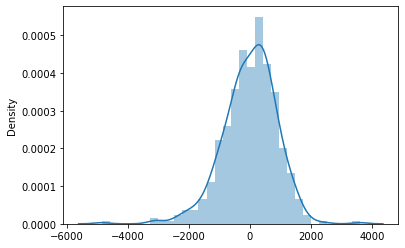

In [87]:
##making distribution for res
sns.distplot(res)

In [88]:
###distribution is centered around zero  and it is approx normal

In [89]:
###prediction and evaluation on the set
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']


#transform on test set only
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [90]:
df_test[num_vars]

,temp,atemp,hum,windspeed
184,0.831783,0.769660,0.657364,0.084219
535,0.901354,0.842587,0.610133,0.153728
299,0.511964,0.496145,0.837699,0.334206
221,0.881625,0.795343,0.437098,0.339570
152,0.817246,0.741471,0.314298,0.537414
...,...,...,...,...
702,0.519232,0.511907,0.756118,0.283397
127,0.584649,0.577380,0.650923,0.069510
640,0.745598,0.682653,0.817947,0.052115
72,0.331557,0.332005,0.512107,0.203418


In [91]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,4560.559091,0.254545,0.263636,...,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.654545,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,1904.968544,0.436599,0.441609,...,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.476601,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
y_test=df_test.pop("cnt")
X_test=df_test

In [95]:
##add a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,...,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,1,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,1,0,0,0,0,1,0,0


In [103]:
X_test_sm=X_test_sm.drop(["mnth_Mar", "mnth_oct", "weekday_Thurs", "atemp", "mnth_Jun", "mnth_Aug", "weekday_Sun", "weekday_Sat", "workingday", "weekday_Wed", "mnth_May", "mnth_Feb", "weathersit_Clear", "hum", "temp", "mnth_Jul", "season_Winter"], axis=1)

In [107]:
##predict
y_test_pred=lr_model.predict(X_test_sm)

In [108]:
###evaluate the model
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7889060578473333

###conclusion

The model is 78.89% is explainin the variance of the demand of the bike share

### Interpertation of the result

1.Company should focus on the business in spring
2. company should put some sales on holiday which can boom there business
3.comapny should give some focus on list snow weather and mist weather